In [17]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from preprocess_util import pre_process_data, impute_vals

In [19]:
c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')
c_test = pd.read_csv("data/C_hhold_test.csv", index_col='id')

In [20]:
c_hhold_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


In [21]:
c_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [22]:
c_filled = impute_vals(c_hhold_train)

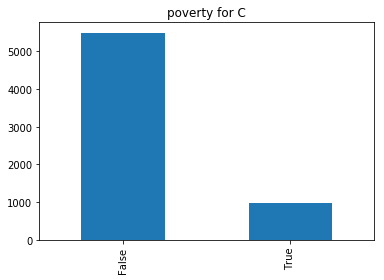

In [23]:
c_filled.poor.value_counts().plot.bar(title="poverty for C")

In [24]:
c_filled_Y = c_filled.poor

In [25]:
c_filled_X = pre_process_data(c_filled.drop('poor', axis=1))

input shape	(6469, 163)
After standardization	(6469, 163)
After one hot encoding of categoricals	(6469, 795)


In [26]:
cX_resampled, cY_resampled = SMOTE().fit_sample(c_filled_X, c_filled_Y)

In [27]:
print(Counter(cY_resampled).items())

dict_items([(False, 5496), (True, 5496)])


In [28]:
cX_resampled.shape

(10992, 795)

In [32]:
cX_resampled = cX_resampled.transpose()

In [33]:
cX_resampled.shape

(795, 10992)

In [34]:
cY_resampled.shape

(1, 10992)

In [35]:
cY_resampled = cY_resampled.reshape(1,10992)

In [36]:
cY_resampled.shape

(1, 10992)

In [171]:
cY_resampled = cY_resampled.astype(float)

# BUILD MODEL

In [37]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [38]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder("float", [n_x, None])
    Y = tf.placeholder("float", [n_y, None])
    
    return X, Y

In [160]:
def initialize_parameters():
    W1 = tf.get_variable("W1", [250,795], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [250,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [150,250], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [150,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [50,150], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [50,1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [1,50], initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [1,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                  }
    
    return parameters


In [155]:
def forward_propagation(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
                                        
    Z1 = tf.add(tf.matmul(W1, X), b1)                      
    A1 = tf.nn.relu(Z1)                                    
    Z2 = tf.add(tf.matmul(W2, A1), b2)                    
    A2 = tf.nn.relu(Z2)                                   
    Z3 = tf.add(tf.matmul(W3, A2), b3)                    
    A3 = tf.nn.relu(Z3)                         
    Z4 = tf.add(tf.matmul(W4, A3), b4)
    return Z4

In [156]:
def compute_cost(z4, Y):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = z4, labels = Y))
    
    return cost

In [174]:
def model(X_train, Y_train, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    tf.reset_default_graph()
    tf.set_random_seed(1)                             
    seed = 3                                       
    (n_x, m) = X_train.shape                          
    n_y = Y_train.shape[0]                                 
    costs = []                                        
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    z4 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(z4, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(minibatch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        #correct_prediction = tf.abs(tf.subtract(z4, Y))

        # Calculate accuracy on the test set
        accuracy = compute_cost(z4, Y)

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        
        return parameters

In [158]:
def predict(X, parameters, num_features):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    W4 = tf.convert_to_tensor(parameters["W4"])
    b4 = tf.convert_to_tensor(parameters["b4"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              "W4": W4,
              "b4": b4
              }
    
    x = tf.placeholder("float", [num_features, None])
    
    z4 = forward_propagation(x, params)
    p = tf.nn.sigmoid(z4)
    
    with tf.Session() as sess:
        prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [48]:
import tensorflow as tf

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [55]:
import math

Cost after epoch 0: 0.689662
Cost after epoch 100: 0.296265
Cost after epoch 200: 0.246149
Cost after epoch 300: 0.214631
Cost after epoch 400: 0.188138
Cost after epoch 500: 0.163434
Cost after epoch 600: 0.139805
Cost after epoch 700: 0.118003
Cost after epoch 800: 0.098321
Cost after epoch 900: 0.080279


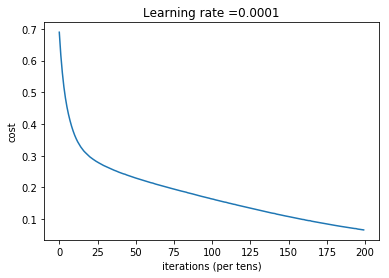

Parameters have been trained!
Train Accuracy: 0.064759575


In [181]:
pred_params = model(cX_resampled, cY_resampled, num_epochs=1000)

In [71]:
c_test = pd.read_csv("data/C_hhold_test.csv", index_col='id')

In [72]:
c_test = impute_vals(c_test)

In [73]:
c_test = c_test.fillna(0)

In [74]:
c_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 6211 to 98377
Columns: 163 entries, GRGAYimk to country
dtypes: float64(1), int64(29), object(133)
memory usage: 4.0+ MB


In [75]:
c_filled_X.columns

Index(['LhUIIEHQ', 'PNAiwXUz', 'jmsRIiqp', 'NONtAKOM', 'kLAQgdly', 'WWuPOkor',
       'CtFxPQPT', 'GIwNbAsH', 'qLDzvjiU', 'detlNNFh',
       ...
       'lAvdypjD_SnGME', 'lAvdypjD_UUKOE', 'lAvdypjD_gWylU', 'lAvdypjD_jSoky',
       'ARWytYMz_NwjRA', 'ARWytYMz_herus', 'eqJPmiPb_Rrpos', 'eqJPmiPb_mORJu',
       'eqJPmiPb_wnPqZ', 'country_C'],
      dtype='object', length=795)

In [76]:
c_hhold_train.columns

Index(['GRGAYimk', 'DNnBfiSI', 'cNDTCUPU', 'GvTJUYOo', 'vmKoAlVH', 'LhUIIEHQ',
       'DTNyjXJp', 'PNAiwXUz', 'ABnhybHK', 'yiuxBjHP',
       ...
       'AJHrHUkH', 'PaEKIlvv', 'bFEsoTgJ', 'ihACfisf', 'obIQUcpS', 'lAvdypjD',
       'ARWytYMz', 'eqJPmiPb', 'mmoCpqWS', 'country'],
      dtype='object', length=164)

In [77]:
c_test = pre_process_data(c_test, enforce_cols=c_filled_X.columns)

input shape	(3187, 163)
After standardization	(3187, 163)
After one hot encoding of categoricals	(3187, 773)


In [78]:
c_test.head()

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,gZWEypOM_iqxdn,ihACfisf_hBRam,kZmWbEDL_dakhN,kdkPWxwS_Qicsw,nomHWXYi_Dadfh,nuMtebks_LHhnr,nuMtebks_hZFmB,qCEuAGDU_qQxrL,qbMphwEx_ppCPk,ueeRzZmV_nwsfJ
id,,,,,,,,,,,,,,,,,,,,,
6211,0.756899,-0.420743,-0.342818,0.819147,1.065812,0.523759,0.301324,0.007565,-0.279542,-0.123344,...,0,0,0,0,0,0,0,0,0,0
77549,0.756899,1.127713,0.426050,0.819147,-1.013694,0.523759,-9.012596,0.007565,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0
34834,-0.612912,-0.313953,0.426050,0.819147,1.065812,0.523759,0.260293,0.972001,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0
74650,-0.612912,-0.207163,-0.342818,0.819147,0.230296,0.523759,-1.216804,0.972001,-0.279542,1.085258,...,0,0,0,0,0,0,0,0,0,0
65375,0.756899,-0.313953,0.426050,0.819147,0.026059,0.523759,0.342354,0.489783,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0


In [79]:
c_test = c_test.transpose()
c_test.head()

id,6211,77549,34834,74650,65375,68425,6142,95572,73658,31069,...,63899,72790,1588,254,68171,6775,88300,35424,81668,98377
LhUIIEHQ,0.756899,0.756899,-0.612912,-0.612912,0.756899,0.756899,-0.612912,-0.612912,-0.612912,-0.612912,...,-0.612912,0.756899,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912
PNAiwXUz,-0.420743,1.127713,-0.313953,-0.207163,-0.313953,0.807342,-0.313953,-0.367348,-0.313953,-0.367348,...,-0.367348,-0.260558,-0.420743,2.515983,6.040056,-0.367348,-0.367348,2.996539,7.588512,2.515983
jmsRIiqp,-0.342818,0.426050,0.426050,-0.342818,0.426050,0.426050,-0.342818,0.426050,-0.342818,-0.342818,...,-0.342818,-0.342818,0.426050,-1.111687,-0.342818,-0.342818,-0.342818,0.426050,-1.111687,-1.111687
NONtAKOM,0.819147,0.819147,0.819147,0.819147,0.819147,0.819147,-0.267706,-0.267706,-0.267706,0.819147,...,-0.811133,0.275720,-0.267706,0.819147,0.819147,0.819147,1.362573,0.819147,0.819147,-0.811133
kLAQgdly,1.065812,-1.013694,1.065812,0.230296,0.026059,-0.605220,0.323131,-0.716622,-0.493817,1.065812,...,1.065812,0.285997,0.137461,0.193162,0.323131,1.065812,0.230296,-2.053447,0.230296,1.065812


In [182]:
c_pred = predict(c_test, pred_params, c_test.shape[0])

In [183]:
c_pred = c_pred.T

In [184]:
c_pred.mean()

0.055086

In [134]:
ctest_cols = c_test.columns.tolist()
#c_pred.shape
#c = pd.DataFrame({'id': c_test.columns,
 #                'poor': c_pred})

In [185]:
c = pd.DataFrame(data={'id': ctest_cols,'poor': c_pred.flatten()})
c.set_index('id')
c.head()

,id,poor
0,6211,0.266076
1,77549,0.423129
2,34834,0.000240
3,74650,0.000090
4,65375,0.027414


In [126]:
#c.to_csv('c_test.csv')

In [186]:
c

,id,poor
0,6211,2.660757e-01
1,77549,4.231291e-01
2,34834,2.399979e-04
3,74650,9.022669e-05
4,65375,2.741361e-02
5,68425,7.230600e-03
6,6142,1.067735e-02
7,95572,1.884929e-04
8,73658,1.323419e-01
9,31069,2.178634e-02


In [172]:
cY_resampled

array([[0., 1., 1., ..., 1., 1., 1.]])